# QubitIL 2024 Hackathon Challenge by Classiq: 
# Developing an Advanced Quantum Algorithm: Approximating a Non-Linear Function

Welcome to the Classiq challenge at the 2024 QubitIL Hackathon!

This Jupyter notebook provides the framework for the challenge. Follow the steps and guidelines outlined in it to complete the challenge successfully. 

Good luck!



The notebook consists of three parts:

1. The challenge, including what you need to create and submit, along with comprehensive guidelines and hints.

2. Instructions for evaluating your solutions to the challenge.

3. An optional hands-on preparation exercise to explore Classiq’s capabilities and gain initial ideas for approaching the challenge.



Additional resources available to you include:
- The IDE of the classiq platform at [platform.classiq.io](https://platform.classiq.io/)
- [Classiq's documentation](https://docs.classiq.io/latest/) with the dedicated [Classiq 101](https://docs.classiq.io/latest/classiq_101/)
- Our [GitHub Repostory](https://github.com/Classiq/classiq-library)
- The [community Slack of Classiq](https://short.classiq.io/join-slack) - where you can search for answers to previously asked questions and ask your own


## Introduction:

The world we live in is inherently non-linear, and numerous industries conduct extensive research leveraging non-linear functions to solve complex problems and drive innovation. In the automotive sector, computational fluid dynamics is used to optimize vehicle efficiency and performance, while in the financial sector, non-linear payoff functions play a cardinal role in modeling and analyzing stock and derivative behaviors.

As a result, non-linear functions such as trigonometric, hyperbolic, and fractional powers are indispensable in classical algorithm design. These complex arithmetic functions are often approximated using fundamental arithmetic operations like addition, subtraction, and multiplication applied to polynomial terms.

Non-linear arithmetic functions also play a pivotal role in fault-tolerant quantum algorithms. For instance, the HHL algorithm incorporates an eigenvalue inversion block that relies on the $arcsin(1/x)$ function. The hyperbolic tangent $tanh(x)$ is utilized in applications like Gibbs state preparation in statistical mechanics. Similarly, the sine function $sin(x)$ frequently arises in wave equation solutions and appears in Hamiltonians of quantum systems with periodic potentials, which are instrumental for modeling conduction in metals. Furthermore, these functions can also serve as activation functions in quantum machine learning.

Even on today’s NISQ devices, implementing generalized arithmetic functions proves valuable for benchmarking and exploring near-term algorithms. However, designing these functions for quantum systems is particularly challenging due to the difficulty of approximating non-linear functions on quantum computers, which inherently rely on linear operations. These implementations often necessitate the use of multiple auxiliary registers to enable out-of-place operations and ensure the accurate approximation of the desired functionality.

Luckily, the Classiq platform allows you to focus on high-level algorithm design while the platform handles the complexities of optimization and implementation, simplifying the design of efficient quantum arithmetic algorithms and advanced quantum algorithms in general!

## The Challenge:
Your challenge is to design a quantum algorithm that accurately approximates $sin(x)$ over the domain $f(x):[0,1)\rightarrow[0,1)$. 

The goal is to achieve maximum accuracy while optimizing for efficiency and minimizing circuit depth, adhering to the constraints of a quantum computer with up to $127$ qubits and a maximum allowable circuit depth of $30,000$. You may assume a logical quantum computer, where errors and error mitigation or correction are not considered.

Your challenge is to design a quantum algorithm that accurately approximates $sin(x)$ over the domain $f(x):[0,1)\rightarrow[0,1)$. 

The goal is to achieve maximum accuracy while optimizing for efficiency and minimizing circuit depth, adhering to the constraints of a quantum computer with up to $127$ qubits and a maximum allowable circuit depth of $30,000$. You may assume a logical quantum computer, where errors and error mitigation or correction are not considered.

When designing an algorithm to tackle a complex problem, it is advisable to adopt a parametric, scalable approach that allows for initial testing on a smaller version of the problem to ensure correctness and feasibility before scaling it up to address the full-scale problem.

The challenge consists of two stages:

1. In the first part of the challenge, you are tasked with testing your designed algorithm using up to 25 qubits and a maximum circuit depth of 2,000. Once the circuit is synthesized, execute it on the Azure IonQ simulator. To assess the accuracy of your algorithm's approximation, the execution results can be evaluated against classically computed values of $sin(x)$ utilizing the `evaluate_score_prec` test function provided in the "Evaluating Your Code" section.

2. In the second and final step, scale your algorithm to achieve the highest possible precision while maintaining the smallest circuit depth, using up to 127 qubits and a maximum depth of 30,000. 

Your code must be designed in a parametric manner, with precision passed as an adjustable parameter (refer to the algorithm-building guidelines in "The Heart of the Code - Build Your Algorithm Here" section). The solution will be evaluated based on the maximum accuracy achieved, as measured by the `evaluate_score_prec` test function, while also taking into account the efficiency, specifically the depth of the synthesized circuit. Additionally, the elegance and originality of the solution may be factored into the assessment of submissions.



To address this challenge, you are required to construct an algorithm that performs the following operation:
$$
|x\rangle_n\rightarrow|x\rangle_n|sin(x)\rangle_m
$$
The precision of your input states ($|x\rangle$), which corresponds to the number of fractional digits they represent, is determined by the number of qubits $n$, and can be implemented using the `allocate_num` built-in function demonstrated in the first part of the optional exercise. The precision of the $|sin(x)\rangle$ states $m$ can be anything you want and might depend on the precision of the input states $n$.


### What You Need to Submit:

The following files should be uploaded to [this Google form](https://fvrn0h72gwo.typeform.com/to/s8qsXJKj) (detailed instructions are provided in the link):

1. This Jupyter notebook, containing your solution and precision values for both stages entered in the "The Heart of the Code - Build Your Algorithm Here" section, along with a comprehensive explanation of your solution.

2. The maximal distance value produced by the `evaluate_score_prec` test function for the first stage.

3. The quantum program for each stage as a .qprog file, incorporating the constraints and preferences specified for each stage.

The quantum program can be extracted and saved using the following code after synthesizing your algorithm and assigning it to `quantum_program`. Make sure that the `program_name` is changed to correspond to the relevant stage:



In [88]:
def save_q_prog(program, file_name="program_name.qprog"):  #TODO change `program_name` to your desired name for every stage
    """
    Saves a quantum program to a .qprog file.

    Args:
        program: The quantum program to be saved (already prepared or synthesized).
        file_name: The name of the .qprog file. Defaults to "program_name.qprog".
                   Update this for each stage.

    Returns:
        None. Writes the quantum program to the specified file and prints a success or error message.
    """
    try:
        qprog = program

        with open(file_name, "w") as file:
            file.write(qprog)

        print(f"Quantum program saved successfully to {file_name}")
    except Exception as e:
        print(f"An error occurred while saving the quantum program: {e}")
        
save_q_prog(quantum_program,"stage1_2.qprog")

Quantum program saved successfully to stage1_2.qprog


### First Steps for Developing your Algorithm:


1. After reviewing the challenge description and submission requirements, you can explore the optional preparation exercise section at the bottom of this notebook to gather ideas and inspiration for constructing your algorithm.


2. Next, go over the "The Heart of the Code - Build Your Algorithm Here" section to section to gain an understanding of the required format and structure for designing your algorithm.

   
3. Before starting to work on your algorithm, it is recommended to read the following paragraph for helpful tips and hints.


### Tips and Hints:

There are various mathematical methods for approximating complex functions. One approach involves using the Taylor series of the function (if it exists) and truncating it at a certain level. 

Another method involves dividing the function's domain into small segments and approximating the function within each segment using a polynomial of a certain degree. The choice of the polynomial degree (linear, quadratic etc.) depends on the size of the segments selected and directly impacts the accuracy of the approximation.

When approaching this challenge, a good starting point is to select the underlying approximation method you want to implement and consider how to utilize quantum properties to design an efficient quantum algorithm. Referring to the optional preparation exercise at the end of this notebook is recommended, as it offers valuable insights into implementing approximations on quantum computers using the Classiq high-level functional design paradigm.




## The Heart of the Code - Build Your Algorithm Here:

## Explanation of our solution:
We split the domain into k intervals(k=4) such that the first interval was set to be [0,0.3] as in this interval we decided to use the small angle approximation sin(x)=x and the other intervals divided [0.3,1) equally, and used piecewise linearization approximation (In this version a Taylor expansion around the left end of the interval).
We calculated the values of the sin function at the ends of the intervals and hardcoded the values in the coefficients arrays (index i in the array for the coefficients of the ith interval).
The input is used as the "control" to choose which interval to calculate the output wit
h. 

All the following imports must be included before the main part of the code:

In [33]:
from classiq import *

from classiq.execution import (ClassiqBackendPreferences,ExecutionPreferences,AzureCredential,AzureBackendPreferences)

import numpy as np
import json


The following function `compute_sin` needs to appear in your code. You can add further variables to the function. Make sure to also take them into account when you call the function. 

Note: do not rename or remove the existing variables `x` and `sin_x`.


In [76]:
# @qfunc
# def control_logic(a: CArray[int], b: CArray[int], controller: QNum, x: QNum, y: QNum):
#     repeat(a.len,         
#             iteration=lambda i: control(controller==i, lambda: inplace_xor(a[i]*x+b[i],y)))
@qfunc
def control_logic_taylor(acos: CArray[int], ys: CArray[int], xs:CArray[int], controller: QNum, x: QNum, y: QNum):
    repeat(acos.len,         
            iteration=lambda i: control(controller==i, lambda: inplace_xor(ys[i]+acos[i]*(x-xs[i]),y)))
    
# The heart of the code - the function that calculates sin(x)
@qfunc
def compute_sin(x: QNum,                   # Do not change this declaration
                 sin_x: Output[QNum],     # Do not change this declaration
                 precision: CInt,    #You can delete this declaration if you do not use it, and add further declarations
               ):
    
    sections = 4
    ctrl = QNum("ctrl")
    allocate_num(num_qubits=np.log2(sections),is_signed=False,fraction_digits=0,out=ctrl)
    allocate_num(num_qubits=4,is_signed=False,fraction_digits=4,out=sin_x)
    inplace_xor(x*2**4 / (2**4 / sections), ctrl)

    # a = [0.959, 0.724]
    # b = [0.0, 0.117]
    acos= [0.955336489125606, 0.8611171691298103, 0.7202271277203233, 0.5403023058681398]
    ys= [0.3, 0.5084065509313012, 0.6937383400791204, 0.8414709848078965]
    xs= [0.3, 0.5333333333333333, 0.7666666666666666, 1.0]
    control_logic_taylor(acos,ys,xs,ctrl,x,sin_x)
    #control_logic(a,b,ctrl,x,sin_x)

For stage 1, the main function should be of the following form and include the additional synthesis constraints and execution preferences for running the quantum program on the Azure IonQ simulator without any issues.

Note: the precision must be provided as a parameter named `precision_stage_#` while replacing the # with the relevant stage number. 


In [85]:
precision_stage_1 = 4 #give your maximal precision parameter value

@qfunc
def main(x: Output[QNum],sin_x: Output[QNum]):

    # A quantum variable which represents fractional numbers is initialized
    allocate_num(num_qubits=precision_stage_1,      
                is_signed=False,            
                fraction_digits=precision_stage_1,
                out=x)
    
    # creating a uniform superposition of all possible values of the quantum number by using a hadamard transform
    hadamard_transform(x)

    # The central function for computing the approximation of sin(x) in the specified domain:
    compute_sin(x,sin_x,precision_stage_1)

# Generating the model
qmod = create_model(main)

# Setting constraints on the circuit synthesis engine
qmod_with_constraints_stage_1 = set_constraints(qmod, Constraints(max_depth=2000, max_width=25))

# Setting execution preferences for executing on the Azure IonQ simulator:
shots = 1000
backend = 'ionq.simulator'

# Applying the given constraints and backend preferences to the model
azure_preferences = AzureBackendPreferences(backend_name=backend,)
azure_qmod_stage_1 = set_execution_preferences(qmod_with_constraints_stage_1, 
                                        ExecutionPreferences(
                                            num_shots=shots))

# Synthesizing the model to a quantum program
quantum_program = synthesize(azure_qmod_stage_1)
show(quantum_program)

# Executing the quantum program through Azure
job = execute(quantum_program) 

# Extract parsed counts from the result
res = job.get_sample_result()

Opening: https://platform.classiq.io/circuit/aabf7c6e-5645-49b0-91e5-79ca261c57bf?version=0.63.1


Important note: the synthesized program must be named `quantum_program` for the evaluation code to properly assess the depth and width of the circuit. Additionally, the execution results of the circuit must be stored in a variable named `res` to enable the evaluation of the accuracy of the approximation results after execution (for stage 1 only).


For your convenience, you can post-process the execution outputs of the first stage in this manner (in addition to evaluating the approximation using the `evaluate_score_prec` test function):


In [86]:
# Extract states and their corresponding `x` values
states_with_x = [
    {
        "state": state,
        "x": res.parsed_states[state]["x"],
        "sin_x": res.parsed_states[state]["sin_x"],
        "shots": res.counts[state]
    }
    for state in res.counts
]

# Sort states by the value of `x`
sorted_states = sorted(states_with_x, key=lambda s: s["x"])

# Print the sorted states and their shot counts
for state in sorted_states:
    print(f"State: {state['state']} | x: {state['x']} | sin_x: {state['sin_x']} | Shots: {state['shots']}")

State: 00000000 | x: 0.0 | sin_x: 0.0 | Shots: 54
State: 00010001 | x: 0.0625 | sin_x: 0.0625 | Shots: 63
State: 00100010 | x: 0.125 | sin_x: 0.125 | Shots: 55
State: 00110011 | x: 0.1875 | sin_x: 0.1875 | Shots: 62
State: 01000100 | x: 0.25 | sin_x: 0.25 | Shots: 67
State: 01010101 | x: 0.3125 | sin_x: 0.3125 | Shots: 80
State: 01010110 | x: 0.375 | sin_x: 0.3125 | Shots: 59
State: 01100111 | x: 0.4375 | sin_x: 0.375 | Shots: 71
State: 10001000 | x: 0.5 | sin_x: 0.5 | Shots: 57
State: 10001001 | x: 0.5625 | sin_x: 0.5 | Shots: 59
State: 10011010 | x: 0.625 | sin_x: 0.5625 | Shots: 60
State: 10101011 | x: 0.6875 | sin_x: 0.625 | Shots: 62
State: 10111100 | x: 0.75 | sin_x: 0.6875 | Shots: 69
State: 10111101 | x: 0.8125 | sin_x: 0.6875 | Shots: 62
State: 11001110 | x: 0.875 | sin_x: 0.75 | Shots: 64
State: 11001111 | x: 0.9375 | sin_x: 0.75 | Shots: 56


In stage 2 of the challenge, the main function should follow this structure and include the additional synthesis constraints:

In [79]:
precision_stage_2 = 4#TODO give your maximal precision parameter value

@qfunc
def main(x: Output[QNum],sin_x: Output[QNum]):

    # A quantum variable which represents fractional numbers is initialized
    allocate_num(num_qubits=precision_stage_2,      
                is_signed=False,            
                fraction_digits=precision_stage_2,
                out=x)
    
    # Creating a uniform superposition of all possible values of the quantum number by using a Hadamard transform
    hadamard_transform(x)

    # The central function for computing the approximation of sin(x) in the specified domain:
    compute_sin(x,sin_x,precision_stage_2)

# Generating the model
qmod = create_model(main)

# Applying the given constraints and backend preferences to the model
quantum_model_with_constraints_stage_2 = set_constraints(
    qmod, Constraints(optimization_parameter="depth", max_width=127))

# Synthesizing the model to a quantum program
quantum_program = synthesize(quantum_model_with_constraints_stage_2)
show(quantum_program)

Opening: https://platform.classiq.io/circuit/4895fd4f-7973-4679-b534-a7bc55516d77?version=0.63.1


Important note: the synthesized circuit must be named `quantum_program` for the evaluation code to properly present the depth and width of the circuit for this stage!

## Evaluating Your Code:

The following test function `evaluate_score_prec` evaluates the difference between your algorithm's approximation of $sin(x)$ and the exact function computed classically using the NumPy package. The metric calculates and returns the maximal distance value between the array of approximated points and the corresponding array of exact values:






In [80]:
import numpy as np

def evaluate_score_prec(res, user_input_precision):
    """
    Evaluates the score based on the provided result object `res` and user-specified precision.

    Args:
        res: The result object containing `parsed_states` and other information.
        user_input_precision: The precision level for the evaluation.

    Returns:
        max_distance: The maximum distance between expected and measured y values.
    """
    # Constants
    precision = user_input_precision # Precision value given in hackathon participants' code
    domain = np.arange(0, 1, 1 / 2**precision) # generates points in the domain [0,1) based on the calculated_precision
    expected_y = np.sin(domain) # Calculates the sin values classically with NumPy

    # Extract parsed states
    parsed_states = res.parsed_states
    
    # Sort parsed states by 'x' values
    parsed_counts = sorted(parsed_states.items(), key=lambda item: item[1]['x'])
    
    # Form the dictionary with x and y values
    results_dict = {float(s[1]['x']): float(s[1]['sin_x']) for s in parsed_counts}

    # Verify all strings were sampled, also no superpositions
    assert len(results_dict) == 2 ** user_input_precision, \
        f"Expected {2 ** user_input_precision} unique states, but got {len(results_dict)}."

    # Compare hackathon participants' results against classical results
    measured_y = []
    for x_val in domain:
        # Find the floored x value that matches the user precision
        x_val_floored = int(x_val * (2 ** user_input_precision)) / (2 ** user_input_precision)
        measured_y.append(results_dict.get(x_val_floored, 0))  # Default to 0 if key is missing

    # Calculate the maximum distance metric
    max_distance = np.max(np.abs(expected_y - np.array(measured_y)))
    return max_distance

In [87]:
max_distance = evaluate_score_prec(res, user_input_precision=precision_stage_1) # The score is evaluated based on the results object `res` from the participants' code and `precision_stage_1`
print(f"Maximum Distance: {max_distance}")

Maximum Distance: 0.05608110826069301


Use this code to extract the width and depth of your synthesized circuits:

In [ ]:
q_program = QuantumProgram.from_qprog(quantum_program) # Gets `quantum_program` from participants' code
print('width =',q_program.data.width)
print('depth =',q_program.transpiled_circuit.depth)

## Optional Preparation Exercise:

This exercise consists of three parts, each adding to the complexity of the previous step.

In each part (except the first), a section of the code is missing and marked with #TODO. Your task is to complete the missing code so that the algorithm runs successfully and produces the correct results.

If you get stuck at any point, refer to the exercise solutions provided at the end of this notebook :)

If you haven't installed the Classiq SDK package yet, you need to install it first by running the following line (or through the terminal):

In [ ]:
!pip install -U classiq

After installation, the final step is to authenticate your device with the Classiq backend:

In [12]:
import classiq
classiq.authenticate()

We start by preparing a uniform superposition of quantum states corresponding to fractional numbers in the domain $[0,1)$, with equal spacing intervals of $\frac{1}{2^K}$, where $K=5$ represents the number of qubits:

In [13]:
from classiq import *
K = 5

@qfunc
def main(x:Output[QNum]): 
    allocate_num(num_qubits=K, is_signed=False, fraction_digits=K,out=x) # allocating K unsigned qubits with a precision (number of fraction digits) of K
    hadamard_transform(x) # Creating a uniform superposition of the different states of x

quantum_model = create_model(main) # Creating the model
quantum_program = synthesize(quantum_model) # Synthesizing the model

show(quantum_program) # View the circuit visualization in the IDE


Opening: https://platform.classiq.io/circuit/964c4baa-b3af-4426-8589-68c6842b922d?version=0.63.1


The built-in `allocate_num` function initializes a quantum variable that can represent different fractional numbers, determined by the number of qubits allocated and the fraction digits defined. By default, `allocate_num` initializes the variable to the $|{0}\rangle_K$ state. The `hadmard_transform` then creates a superposition of all possible states in the range mentioned above.

Note that increasing the number of qubits $K$ in our example improves the precision of the fraction, as the number of decimal places scales with $K$ due to the properties of base-2 representation.







Next, we will construct the general linear function $y= ax+b$, where $a=2$ and $b=1$ are classical integer parameters, and $x$ and $y$ are quantum states representing integers:

In [14]:
@qfunc
def linear_func(a: CInt, b: CInt, x:QNum, y: Output[QNum]):
    y |= a*x+b #Initializing y with the linear function values


In [ ]:
@qfunc
def main(x:Output[QNum], y: Output[QNum]):
    a = 2
    b = 1

    allocate_num(4,False,0,x)
    #TODO initialize x with four (4) qubits and prepare the variable in a uniform superposition.
    #TODO use the `linear_func` to output the different corresponding values of x and y

qmod = create_model(main)
quantum_program = synthesize(qmod)
job = execute(quantum_program)
job.open_in_ide() # View the resulted histogram in the IDE

This operation is performed very elegantly with Classiq, creating the entangled superposition of states $
\sum_{x =0}^{2^4-1}\ket{x}\ket{2 x+1}$.

Extracting the results through the SDK will yield the corresponding values of $x$ and $y$:

In [ ]:
result = job.result()
parsed_counts = result[0].value.parsed_counts
for sampled_state in parsed_counts: print(sampled_state.state)

There are cases that we would like to apply two different linear operations to the same quantum variable $y$. This is not trivial since each arithmetic operation initializes a new quantum variable.

This can be carried out by first regularly applying the linear operation to a new variable and then using an XOR operation to pass it to a desired variable. 




Let's first define the functional building block:

In [125]:
@qfunc
def inplace_linear_operation(a: CInt, b: CInt, x: QNum, y: QNum):
    tmp = QNum('tmp')
    linear_func(a,b,x,tmp)
    inplace_xor(tmp,y) # Bitwise-XOR of a quantum variable with an arithmetic expression

And continuing to the main function, checking the implementation:

In [ ]:
@qfunc
def main(x: Output[QNum],y: Output[QNum]):
    a = 1
    b = 2

    allocate_num(4,False,0,y)
    allocate_num(4,False,0,x)
    hadamard_transform(x)
    inplace_linear_operation(a,b,x,y)

qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

This method is useful for applying a controlled operation on different linear operations. 

For the last task, we want to add a controlled operation that implements the linear function $\ket{x}\rightarrow\ket{x}\ket{2x+1}$ for a control state of $|{0}\rangle $, and implements the linear function $\ket{x}\rightarrow\ket{x}\ket{x+2}$ if the control state is in the $|{1}\rangle $ state.

To this end, we make use of the `within_apply` statement ([read more](https://docs.classiq.io/latest/qmod-reference/api-reference/operations/?h=within_apply#classiq.qmod.builtins.operations.within_apply)). The `within_apply` statement implements the operation $UVU^{\dagger}$ where $U$ is only utilized to prepare the state for the action of $V$. After the action of $V$, $U$ is uncomputed by $U^{\dagger}$. In this case, the linear operation variable serves as a temporary placeholder, initially storing the operation outcomes and subsequently transferring them to the target variable, allowing the linear operation to be uncomputed later.


First, we utilize the `within_apply` statement for our case:

In [ ]:
@qfunc
def linear_func(a: CInt, b: CInt, x:QNum, y: Output[QNum]):
    y |= a*x+b
    
@qfunc
def inplace_linear_func(a: CInt, b: CInt, x:QNum, y: QNum): # A more efficient bitwise XOR
    #TODO declare and initialize the `tmp` variable
    within_apply(within= lambda: linear_func(a,b,x,tmp),
                apply= lambda: inplace_xor(tmp,y))

Important note: The above two functions become unnecessary when the Classiq native construct `inplace_xor` is leveraged more effectively!  Directly implementing `inplace_xor(a[i]*x+b[i], y)` within the `control_logic` function (defined below) eliminates the need for the `tmp` variable, making the algorithm less costly. 

#TODO: Implement this yourself after completing the rest of the function and compare between results! 







Now, we proceed to define the `control_logic` function, implementing an iterative control operation while modifying the $a$ and $b$ coefficients:


In [137]:
@qfunc
def control_logic(a: CArray[int], b: CArray[int], controller: QNum, x: QNum, y: QNum): # Implements a repeated control operation, altering a and b
    
    repeat(count=a.len,         
            iteration=lambda i: control(controller==i, lambda: inplace_linear_func(a[i],b[i],x,y)))

Finally, we bring all the functions together within the `main` function:



In [ ]:
@qfunc
def main(controller: Output[QNum], x: Output[QNum],y: Output[QNum]):

    # Linear polynomial parameters
    a = [2,1]
    b = [1,2]

    # TODO: Initialize x to a uniform superposition in the domain [0,2^4-1], initialize y for the same number of qubits as x
    # TODO: initialize the control qubit to a uniform superposition
    # TODO: Call the `control_logic` function with correct arguments
    
qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

We can now execute the quantum program and extract the results to verify that the algorithm works as intended:


In [ ]:
def print_parsed_counts(job):
    results = job.result() # gets results
    parsed_counts = results[0].value.parsed_counts
    for parsed_state in parsed_counts: print(parsed_state.state)

job = execute(qprog)
print_parsed_counts(job)

Note that there could be a rounding and overflow issue— it is impossible to represent the number $2*15+1=31$ using only $4$ binary digits, as the domain $[0,31]$ requires at least 5 bits for representation. See the Classiq [documentation](https://docs.classiq.io/latest/explore/functions/function_usage_examples/arithmetic/arithmetic_expression/arithmetic_expression_example/?h=arithmetic+operators) for further explanations.

Alternatively, we can use Classiq's powerful synthesis engine to optimize the circuit for minimal width:



In [ ]:
constraints = Constraints(optimization_parameter='width')
qmod = set_constraints(qmod,constraints)
qprog = synthesize(qmod)
quantum_program = QuantumProgram.from_qprog(qprog)
print('width =',quantum_program.data.width)
print('depth =',quantum_program.transpiled_circuit.depth)

And subsquently compare it to a circuit optimized for minimal depth:

In [ ]:
constraints = Constraints(optimization_parameter='depth')
qmod = set_constraints(qmod,constraints)
qprog = synthesize(qmod)
quantum_program = QuantumProgram.from_qprog(qprog)
print('width =',quantum_program.data.width)
print('depth =',quantum_program.transpiled_circuit.depth)

Here, we can clearly observe the power of high-level functional design!

The same algorithm with identical functionality has been optimized for width, resulting in a far more qubit-efficient circuit, compared to the depth-optimized circuit. While the depth-optimized circuit utilizes more qubits to achieve a shallower design, both circuits ultimately implement the same functionality.








## Solutions to the Optional Preparation Exercise:

Second task (building a linear function):

In [136]:
from classiq import *

In [137]:
@qfunc
def linear_func(a: CInt, b: CInt, x:QNum, y: Output[QNum]):
    y |= a*x+b
    
@qfunc
def main(x:Output[QNum], y: Output[QNum]):
    a = 2
    b = 1
    allocate_num(num_qubits=4,is_signed=False,fraction_digits=0,out=x)
    hadamard_transform(x)
    linear_func(a,b,x,y)

qmod = create_model(main)
quantum_program = synthesize(qmod)
show(quantum_program)
job = execute(quantum_program)
job.open_in_ide() # View the resulting histogram in the IDE

Opening: https://platform.classiq.io/circuit/cbba63bb-b427-4a9d-9ad5-4583190413a2?version=0.63.1


Third task (applying two different linear operations to a target variable in a controlled manner), without making use of the `tmp` variable:

In [ ]:
@qfunc
def control_logic(a: CArray[int], b: CArray[int], controller: QNum, x: QNum, y: QNum):
    
    repeat(count=a.len,         
            iteration=lambda i: control(controller==i, lambda: inplace_xor(a[i]*x+b[i],y)))

@qfunc
def main(controller: Output[QNum], x: Output[QNum],y: Output[QNum]):

    # Linear polynomial parameters
    a = [2,1]
    b = [1,2]


    # Initializing x to a superposition in the domain [0,2^4-1]
    allocate_num(4,False,0,x)
    hadamard_transform(x)
    
    #Initialize y
    allocate_num(4,False,0,y)

    # Setting the controller in a superposition
    allocate_num(1,False,0,controller)
    H(controller)

    # Implementing the control logic
    control_logic(a,b,controller,x,y)

    
qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

def print_parsed_counts(job):
    results = job.result()
    parsed_counts = results[0].value.parsed_counts
    for parsed_state in parsed_counts: print(parsed_state.state)

job = execute(qprog)
print_parsed_counts(job)

constraints = Constraints(optimization_parameter='width')
qmod = set_constraints(qmod,constraints)
qprog = synthesize(qmod)
quantum_program = QuantumProgram.from_qprog(qprog)
print('width (optimized for width) =',quantum_program.data.width)
print('depth (optimized for width) =',quantum_program.transpiled_circuit.depth)

constraints = Constraints(optimization_parameter='depth')
qmod = set_constraints(qmod,constraints)
qprog = synthesize(qmod)
quantum_program = QuantumProgram.from_qprog(qprog)
print('width (optimized for depth)=',quantum_program.data.width)
print('depth (optimized for depth)=',quantum_program.transpiled_circuit.depth)

Note that this code might not be visualizable with the new visualization. If this is the case, you can switch to the old visualization to observe the building blocks.


In [59]:
import matplotlib.pyplot as plt


In [68]:
@qfunc
def control_logic(a: CArray[int], b: CArray[int], controller: QNum, x: QNum, y: QNum):
    repeat(a.len,         
            iteration=lambda i: control(controller==i, lambda: inplace_xor(a[i]*x+b[i],y)))

@qfunc
def control_logic_taylor(acos: CArray[int], ys: CArray[int], xs:CArray[int], controller: QNum, x: QNum, y: QNum):
    repeat(acos.len,         
            iteration=lambda i: control(controller==i, lambda: inplace_xor(ys[i]+acos[i]*(x-xs[i]),y)))

@qfunc
def main(ctrl:Output[QNum], x:Output[QNum], y: Output[QNum]):
    # init
    sections = 4
    allocate_num(num_qubits=np.log2(sections),is_signed=False,fraction_digits=0,out=ctrl)
    allocate_num(num_qubits=4,is_signed=False,fraction_digits=4,out=x)
    allocate_num(num_qubits=4,is_signed=False,fraction_digits=4,out=y)
    hadamard_transform(x)
    inplace_xor(x * (2**4) / (2**4 / sections), ctrl)

    # a = [0.9973978670818215, 0.981833806954362, 0.9509485586521971, 0.9052240761452435, 0.8453738746900736, 0.7723318966629753, 0.6872379377015436, 0.5914198605749554]
    # b = [0.0, 0.0019455075159324486, 0.009666819591473669, 0.02681350053158127, 0.05673860125916619, 0.10238983752610264, 0.1662103067471764, 0.25005112423294107]56696
    acos= [0.955336489125606, 0.8611171691298103, 0.7202271277203233, 0.5403023058681398]
    ys= [0.3, 0.5084065509313012, 0.6937383400791204, 0.8414709848078965]
    xs= [0.3, 0.5333333333333333, 0.7666666666666666, 1.0]

    #
    #
    #
    
    #control_logic(a,b,ctrl,x,y)
    control_logic_taylor(acos,ys,xs,ctrl,x,y)
    

def print_parsed_counts(job):
    results = job.result()
    parsed_counts = results[0].value.parsed_counts
    for parsed_state in parsed_counts: print(parsed_state.state)

qmod = create_model(main)
inbetween_model = set_constraints(qmod, Constraints(optimization_parameter=OptimizationParameter.DEPTH, max_width=25))
qprog = synthesize(inbetween_model)
# show(qprog)
job = execute(qprog)
print_parsed_counts(job)

quantum_program = QuantumProgram.from_qprog(qprog)
print('width (optimized for depth)=',quantum_program.data.width)
print('depth (optimized for depth)=',quantum_program.transpiled_circuit.depth)

{'ctrl': 0, 'x': 0.125, 'y': 0.125}
{'ctrl': 1, 'x': 0.25, 'y': 0.25}
{'ctrl': 2, 'x': 0.625, 'y': 0.5625}
{'ctrl': 2, 'x': 0.5, 'y': 0.5}
{'ctrl': 0, 'x': 0.1875, 'y': 0.1875}
{'ctrl': 0, 'x': 0.0625, 'y': 0.0625}
{'ctrl': 1, 'x': 0.375, 'y': 0.3125}
{'ctrl': 3, 'x': 0.8125, 'y': 0.6875}
{'ctrl': 1, 'x': 0.3125, 'y': 0.3125}
{'ctrl': 3, 'x': 0.9375, 'y': 0.75}
{'ctrl': 0, 'x': 0.0, 'y': 0.0}
{'ctrl': 3, 'x': 0.875, 'y': 0.75}
{'ctrl': 1, 'x': 0.4375, 'y': 0.375}
{'ctrl': 3, 'x': 0.75, 'y': 0.6875}
{'ctrl': 2, 'x': 0.5625, 'y': 0.5}
{'ctrl': 2, 'x': 0.6875, 'y': 0.625}
width (optimized for depth)= 25
depth (optimized for depth)= 1753


In [61]:
def decimal(K,x):
    return x*1/(2**K)

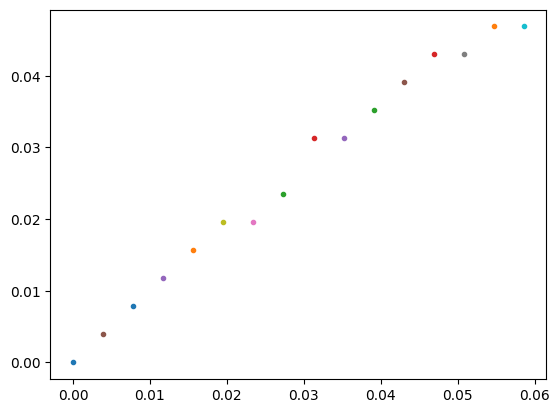

In [69]:
results = job.result()
parsed_counts = results[0].value.parsed_counts
plt.figure()
for parsed_state in parsed_counts: 
    plt.plot(decimal(4,parsed_state.state['x']),decimal(4,parsed_state.state['y']),'.')

In [56]:
sections = 4
interval = 0.7
dx = interval/(sections-1)

a = []
b = []
acos = [np.cos(0.3)]
ys = [0.3]
xs = [0.3]
for i in range(1, sections):
    x1 = 0.3+ dx*i
    x2 = 0.3+ dx*(i+1)
    middle = (x1+x2)/2
    xs +=[x1]
    y1=np.sin(x1)
    ys+= [np.sin(x1)]
    y2=np.sin(x2)

    acos += [np.cos(x1)]
    a += [(y2-y1)/(x2-x1)]
    b += [-(y2-y1)/(x2-x1)*x1+y1]
# (y2-y1)/(x2-x1)*(x-x1)+y1

print(f"a: {a}")
print(f"acos= {acos}")
print(f"b: {b}")
print(f"ys= {ys}")
print(f"xs= {xs}")
5

a: [0.7942790963477968, 0.6331399059804689, 0.4376858776012996]
acos= [0.955336489125606, 0.8611171691298103, 0.7202271277203233, 0.5403023058681398]
b: [0.08479103287914286, 0.20833107882742763, 0.4037851072065969]
ys= [0.3, 0.5084065509313012, 0.6937383400791204, 0.8414709848078965]
xs= [0.3, 0.5333333333333333, 0.7666666666666666, 1.0]


5

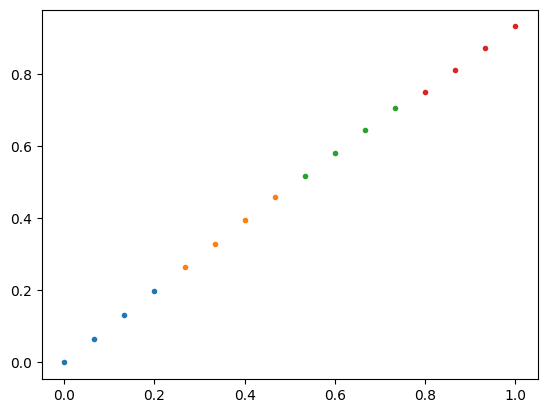

In [144]:
x=np.linspace(0,1,16)
for i in range(sections):
    part_of_x = x[4*i:4*i+4]
    plt.plot(part_of_x, a[i]*part_of_x+b[i], '.')

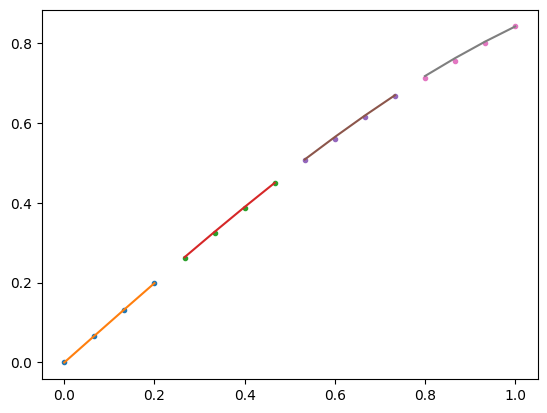

In [177]:
x=np.linspace(0,1,16)
for i in range(sections):
    part_of_x = x[4*i:4*i+4]
    plt.plot(part_of_x, a[i]*part_of_x+b[i], '.')
    plt.plot(part_of_x, np.sin(part_of_x),'-')